# Benefit of MPL System Modelling

In [1]:
import numpy as np
from copy import deepcopy as dc

from functionfile_system_definition import sys_from_file, system_display_matrix
from functionfile_system_mplcost import cost_function_1, initial_values_init, actuator_selection_cost_1, plot_actuator_selection_1, simulation_actuator_selection, plot_simulation

In [2]:
test_set = 'Test1'
S_True = sys_from_file('True System ' + test_set)
# system_display_matrix(S_True)
initial_values = initial_values_init(S_True, T=50)

System read from file @ system_model/True System Test1.pickle 

Generating random sample of initial state from given distribution for simulation


## Control of True System based on Nominal System model

##### Run Code

In [3]:
S_Nominal = sys_from_file('Nominal System ' + test_set)

System read from file @ system_model/Nominal System Test1.pickle 



In [4]:
ret1_nom = actuator_selection_cost_1(S_Nominal, initial_values=initial_values)
S_Nominal = dc(ret1_nom['system'])
# system_display_matrix(S_Nominal)
S_True['B'] = dc(S_Nominal['B'])
ret2_nom = simulation_actuator_selection(S_Nominal, S_True, initial_values=initial_values)

##### Display Output

In [5]:
print('Cost change with |S|:\n')
for i in ret2_nom['costs']:
    print('|S|:',i, ' => ', ret2_nom['costs'][i][-1])

Cost change with |S|:

|S|: 1  =>  98.90508142867111
|S|: 2  =>  94.38673783429292
|S|: 3  =>  79.48205232615577
|S|: 4  =>  76.51167472054321
|S|: 5  =>  76.26689238932487
|S|: 6  =>  76.23860716645495
|S|: 7  =>  74.4021481450352
|S|: 8  =>  68.57054807629089


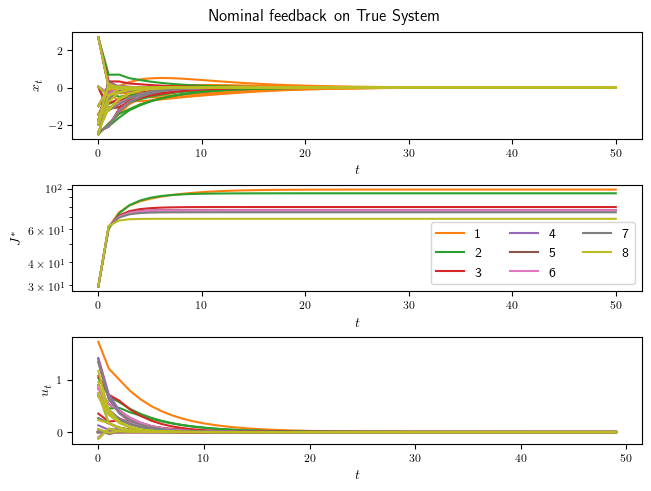

In [6]:
plot_simulation(display_data=ret2_nom, fname='Nominal feedback on True System')

## Control of True System based on MPL System model

##### Run Code

In [7]:
S_MPL = sys_from_file('MPL System ' + test_set)

System read from file @ system_model/MPL System Test1.pickle 



In [8]:
ret1_MPL = actuator_selection_cost_1(S_MPL, initial_values=initial_values)
S_MPL = dc(ret1_MPL['system'])
# system_display_matrix(S_MPL)
S_True['B'] = dc(S_MPL['B'])
ret2_MPL = simulation_actuator_selection(S_MPL, S_True, initial_values=initial_values)

##### Display Output

In [9]:
print('Cost change with |S|:\n')
for i in ret2_MPL['costs']:
    print('|S|:',i, ' => ', ret2_MPL['costs'][i][-1])

Cost change with |S|:

|S|: 1  =>  98.90508142867111
|S|: 2  =>  94.38673783429292
|S|: 3  =>  79.48205232615577
|S|: 4  =>  76.51167472054321
|S|: 5  =>  76.26689238932487
|S|: 6  =>  76.23860716645495
|S|: 7  =>  74.4021481450352
|S|: 8  =>  68.57054807629089


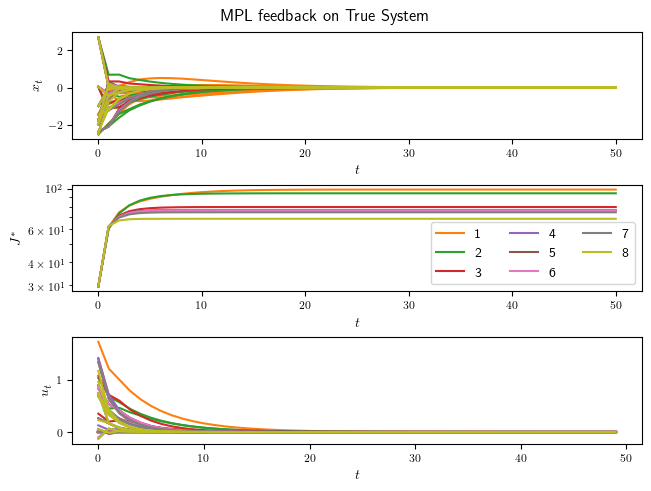

In [10]:
plot_simulation(display_data=ret2_MPL, fname='MPL feedback on True System')

## Self-Control Tests

### Testing Nominal control on itself

##### Run Code

In [11]:
ret3_nom = simulation_actuator_selection(S_Nominal, S_Nominal)

Generating random sample of initial state from given distribution for simulation


##### Display Output

In [12]:
# plot_actuator_selection_1(S_Nominal['B'], ret1_nom['cost_trend'], ret1_nom['time_trend'], ret1_nom['check_trend'], fname='Nominal Actuator Selection')

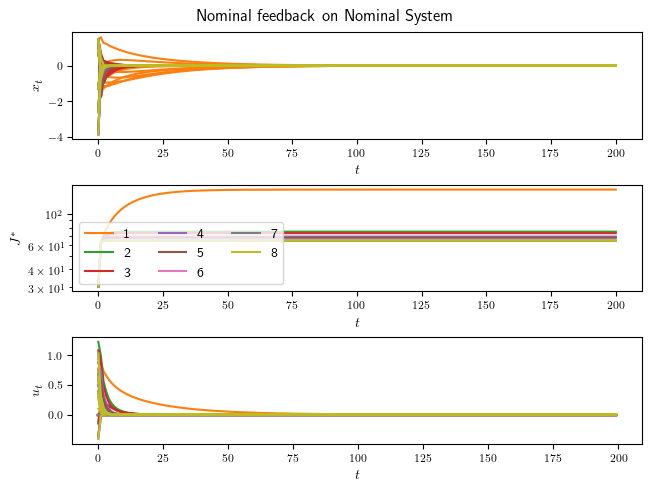

|S|: 1  =>  149.83770178866135
|S|: 2  =>  74.73966325036969
|S|: 3  =>  72.88655898053514
|S|: 4  =>  68.9293444475055
|S|: 5  =>  67.56786304421186
|S|: 6  =>  64.61212119935766
|S|: 7  =>  64.39365216460567
|S|: 8  =>  64.35650914511461


In [13]:
plot_simulation(display_data=ret3_nom, fname='Nominal feedback on Nominal System')
for i in ret3_nom['costs']:
    print('|S|:',i, ' => ', ret3_nom['costs'][i][-1])

### Testing MPL control on itself

##### Run Code

In [14]:
ret3_MPL = simulation_actuator_selection(S_MPL, S_MPL)

Generating random sample of initial state from given distribution for simulation
====> Breaking current simulation at t= 37  as cumulative cost magnitude exceed 10^(10)
====> Breaking current simulation at t= 129  as cumulative cost magnitude exceed 10^(10)
====> Breaking current simulation at t= 170  as cumulative cost magnitude exceed 10^(10)


##### Display Output

In [15]:
# plot_actuator_selection_1(S_MPL['B'], ret1_MPL['cost_trend'], ret1_MPL['time_trend'], ret1_MPL['check_trend'], fname='MPL Actuator Selection')

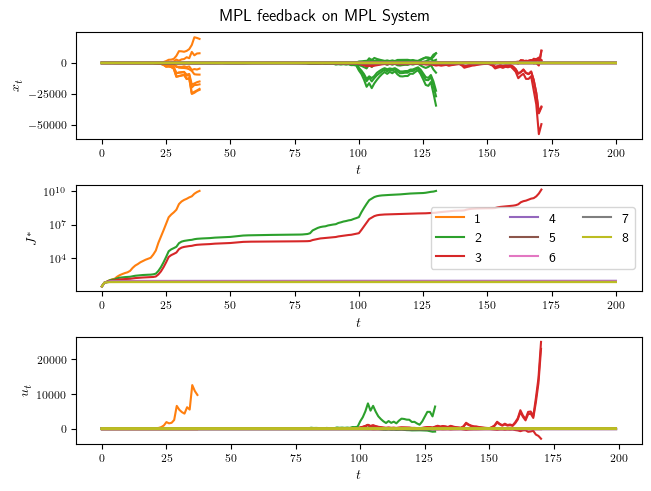

|S|: 1  =>  nan
|S|: 2  =>  nan
|S|: 3  =>  nan
|S|: 4  =>  102.40950429628697
|S|: 5  =>  96.3318292270788
|S|: 6  =>  95.29815036712273
|S|: 7  =>  84.23607473493416
|S|: 8  =>  78.22609927572874


In [16]:
plot_simulation(display_data=ret3_MPL, fname='MPL feedback on MPL System')
for i in ret3_MPL['costs']:
    print('|S|:',i, ' => ', ret3_MPL['costs'][i][-1])